Predict the price of the Uber ride from a given pickup point to the agreed drop-off
location. Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/Tanmay49/SEM7/main/ML/uber.csv')

In [ ]:
df.head()

In [50]:
df = df.drop(["Unnamed: 0","key","pickup_datetime"],axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_longitude   200000 non-null  float64
 2   pickup_latitude    200000 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 9.2 MB


In [53]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [54]:
df.dropna(inplace=True)
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

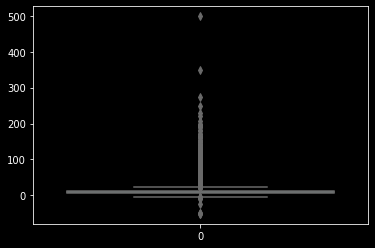

In [55]:
# outliers
sns.boxplot(df['fare_amount'])

<Axes: >

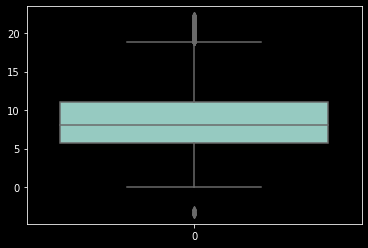

In [56]:
# remove outliers
q1 = df['fare_amount'].quantile(0.25)
q3 = df['fare_amount'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]
sns.boxplot(df['fare_amount'])

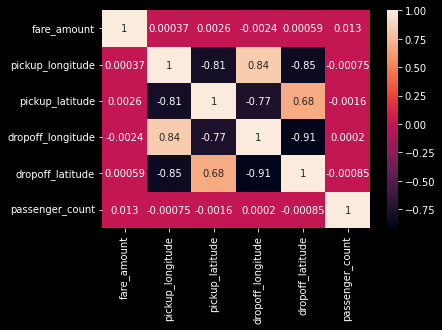

In [ ]:
# Check the correlation
# Determine the correlation between features and the target variable (fare_amount).
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [58]:
x = df.drop('fare_amount',axis=1)
y = df['fare_amount']

In [59]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [62]:
from sklearn.ensemble import RandomForestRegressor 
rfrmodel = RandomForestRegressor(n_estimators=100,random_state=42)
rfrmodel.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [67]:
from sklearn import metrics
def apply_model(model): #Model to print the metrics of the various prediction models
    print("Training score = ",model.score(x_train,y_train))
    print("Testing score = ",model.score(x_test,y_test))
    print("Accuracy = ",model.score(x_test,y_test))
    y_pred = model.predict(x_test)
    print("Predicted values:\n",y_pred)
    print("Mean Absolute Error =", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error =", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error =", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print("R2 Score = ",metrics.r2_score(y_test,y_pred))

In [73]:
apply_model(linear)

Training score =  0.00022188858254246213
Testing score =  8.297133767465326e-05
Accuracy =  8.297133767465326e-05
Predicted values:
 [8.9092654  8.90920366 8.90920456 ... 9.12111117 8.90927677 8.90927104]
Mean Absolute Error = 3.281045635637278
Mean Squared Error = 17.111660495822385
Root Mean Squared Error = 4.136624287486402
R2 Score =  8.297133767465326e-05


In [70]:
apply_model(rfrmodel)

Training score =  0.9417078972082326
Testing score =  0.7052136223044838
Accuracy =  0.7052136223044838
Predicted values:
 [ 5.141 17.307  7.891 ...  7.302  4.207 10.231]
Mean Absolute Error = 1.575169633369157
Mean Squared Error = 5.044702979673337
Root Mean Squared Error = 2.2460416246528774
R2 Score =  0.7052136223044838
